In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
result = np.zeros((3720))
i=0

In [3]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
for year in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn300/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+year+'-'+mm +'.TAUX.nc')
        #plotvar = data.variables['TAUX'][0,200:500,600:1300]
        data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn300/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+year+'-'+mm +'.TAUX.nc')
        U = data.variables['TAUX'][0,:,500:1400]
        U[U == -1.0] = np.nan
        data2=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn300/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+year+'-'+mm +'.TAUY.nc')
        V = data2.variables['TAUY'][0,:,500:1400]
        V[V == -1.0] = np.nan
        #MM = U*U + V*V
        M = U + V
        MM =M*M
        re = np.nanmean(MM,axis=0)
        result[i] = np.nanmean(re,axis=0)
        i = i+1

        

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [4]:
#result = np.sqrt(result)

In [5]:
final = np.zeros((310))
years = np.arange(0,3720,12)
i = 0
for ii in years:
    final[i] = (result[ii]+result[ii+1]+result[ii+2]+result[ii+3]+result[ii+4]+result[ii+5]+result[ii+6]+result[ii+7]+result[ii+8]+result[ii+9]+result[ii+10]+result[ii+11])/12
    #final[i,:] = (result[ii,:]+result[ii+1,:]+result[ii+2,:])/3
    i = i+1

Text(0.5, 1.0, 'Sea Surface Height Yearly Averaged (60$^\\circ$W - 30$^\\circ$E)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


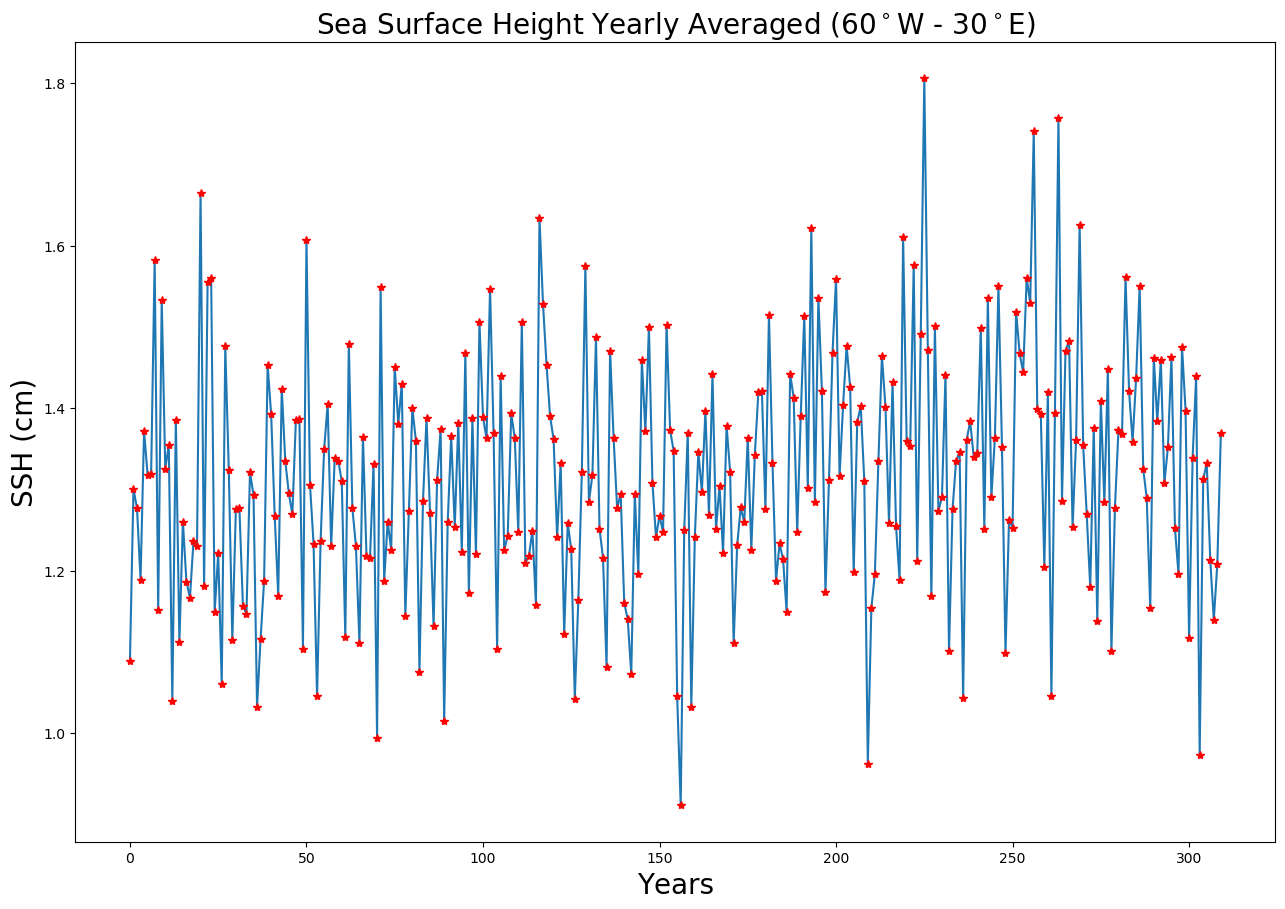

In [6]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(final)
im = ax0.plot(final,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
#plt.xticks(range(0,311,20), ['20', '40', '60', '80','100','120','140','160',\
                           #  '180','200','220', '240', '260','280','300','320'],**my_font)
#plt.yticks(range(-205,-183,3), ['-205', '-202', '-199', '-196', '-193','-190','-187','-184'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SSH (cm)',**my_font)
ax0.set_title('Sea Surface Height Yearly Averaged (60$^\circ$W - 30$^\circ$E)',**my_font)
#plt.savefig("SSH1.png")

In [7]:
# 5 year running average
window = 5
weights = np.repeat(1.0, window)/window
smas = np.convolve(final, weights, 'valid')

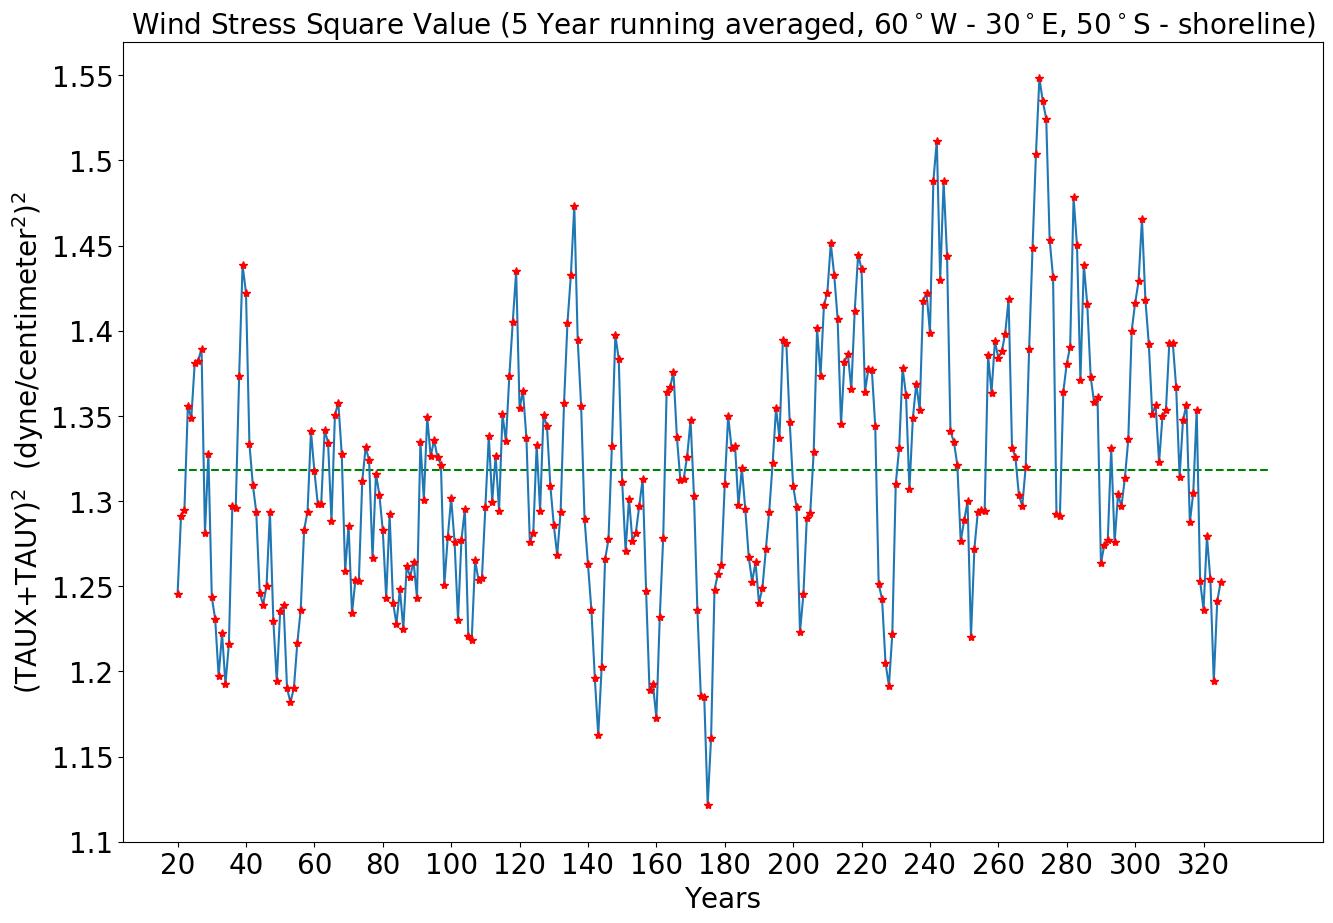

In [19]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(smas)
im = ax0.plot(smas,'r*')
plt.hlines(1.3183960797175895, 0, 319, colors = "g",linestyles = "dashed")
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,311,20), ['20', '40', '60', '80','100','120','140','160',\
                             '180','200','220', '240', '260','280','300','320'],**my_font)
plt.yticks(np.arange(1.1,1.6,0.05), ['1.1','1.15','1.2','1.25','1.3','1.35', '1.4','1.45', '1.5','1.55'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(TAUX+TAUY)$^2$  (dyne/centimeter$^2$)$^2$',**my_font)
ax0.set_title('Wind Stress Square Value (5 Year running averaged, 60$^\circ$W - 30$^\circ$E, 50$^\circ$S - shoreline)',**my_font)
plt.savefig("TAU2.png")

Text(0.5, 1.0, 'Wind Speed Square (5 Year running averaged, 60$^\\circ$W - 30$^\\circ$E)')

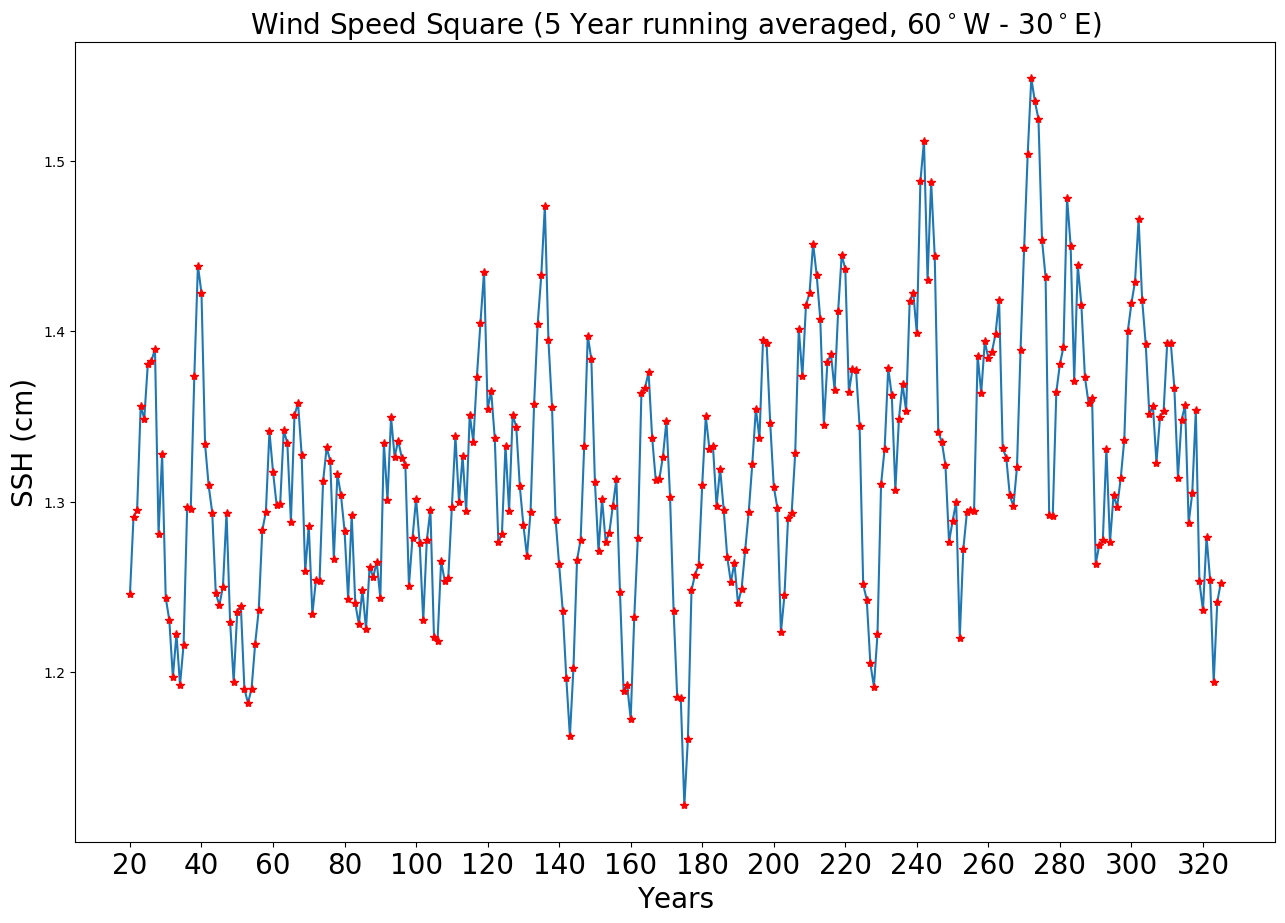

In [9]:

fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(smas)
im = ax0.plot(smas,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,311,20), ['20', '40', '60', '80','100','120','140','160',\
                             '180','200','220', '240', '260','280','300','320'],**my_font)
#plt.yticks(range(-205,-183,3), ['-205', '-202', '-199', '-196', '-193','-190','-187','-184'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SSH (cm)',**my_font)
ax0.set_title('Wind Speed Square (5 Year running averaged, 60$^\circ$W - 30$^\circ$E)',**my_font)
#plt.savefig("SSH1.png")

In [18]:
smas.mean()

1.3183960797175895